# Review Data & Statistics

In [68]:
# read the csv file
import pandas as pd
import numpy as np
import seaborn as sns
housing = pd.read_csv("Ames_Housing_Cleaned.csv")

In [43]:
# count records, show columns, check for blank cells (none)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   area            2930 non-null   int64 
 1   price           2930 non-null   int64 
 2   MS.Zoning       2930 non-null   object
 3   Lot.Area        2930 non-null   int64 
 4   Neighborhood    2930 non-null   object
 5   Bldg.Type       2930 non-null   object
 6   Overall.Qual    2930 non-null   int64 
 7   Overall.Cond    2930 non-null   int64 
 8   Year.Built      2930 non-null   int64 
 9   Year.Remod.Add  2930 non-null   int64 
 10  Exter.Qual      2930 non-null   object
 11  Exter.Cond      2930 non-null   object
 12  Full.Bath       2930 non-null   int64 
 13  Half.Bath       2930 non-null   int64 
 14  Bedroom.AbvGr   2930 non-null   int64 
 15  Kitchen.Qual    2930 non-null   object
 16  TotRms.AbvGrd   2930 non-null   int64 
 17  Mo.Sold         2930 non-null   int64 
 18  Yr.Sold 

In [50]:
# print column names
print(housing.keys())

Index(['area', 'price', 'MS.Zoning', 'Lot.Area', 'Neighborhood', 'Bldg.Type',
       'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add',
       'Exter.Qual', 'Exter.Cond', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.Qual', 'TotRms.AbvGrd', 'Mo.Sold', 'Yr.Sold'],
      dtype='object')


In [51]:
# look at statistics
print(housing.describe())

              area          price       Lot.Area  Overall.Qual  Overall.Cond  \
count  2929.000000    2929.000000    2929.000000   2929.000000   2929.000000   
mean   1499.678389  180817.206555   10148.990440      6.095254      5.563332   
std     505.594782   79892.130737    7881.150942      1.411122      1.111678   
min     334.000000   12789.000000    1300.000000      1.000000      1.000000   
25%    1126.000000  129500.000000    7441.000000      5.000000      5.000000   
50%    1442.000000  160000.000000    9439.000000      6.000000      5.000000   
75%    1743.000000  213500.000000   11556.000000      7.000000      6.000000   
max    5642.000000  755000.000000  215245.000000     10.000000      9.000000   

        Year.Built  Year.Remod.Add    Full.Bath    Half.Bath  Bedroom.AbvGr  \
count  2929.000000     2929.000000  2929.000000  2929.000000    2929.000000   
mean   1971.353704     1984.268351     1.566405     0.379652       2.853875   
std      30.250195       20.863621     0.5

# Visualizations & Finding Outliers

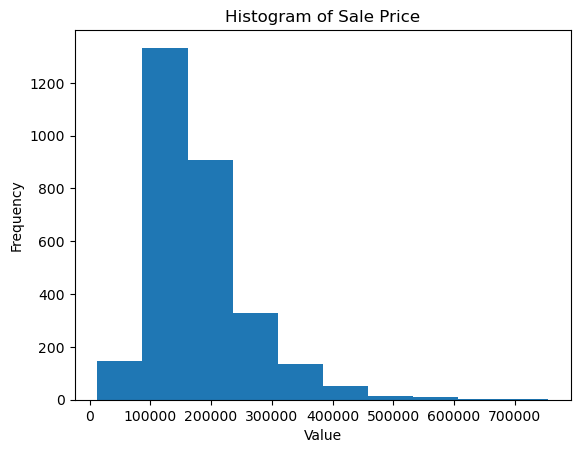

In [27]:
# histogram of sale price
plt.hist(price)
plt.title('Histogram of Sale Price')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

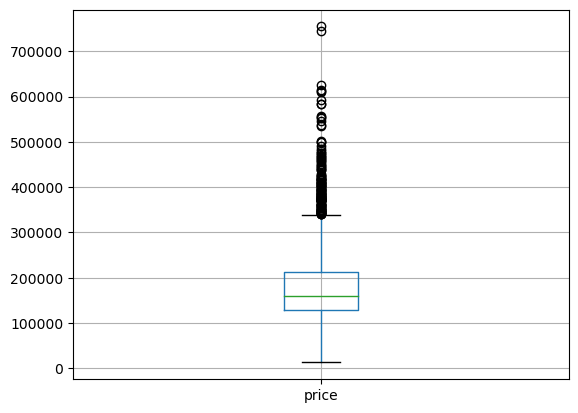

In [56]:
# boxplot of sale price
# helpful in finding outliers
housing.boxplot('price')

# Remove Outliers & Look at Distributions Without Outliers

In [82]:
housing_outliers = housing[(housing.price < housing.price.quantile(.995)) & (housing.price > housing.price.quantile(.005))]


<AxesSubplot:>

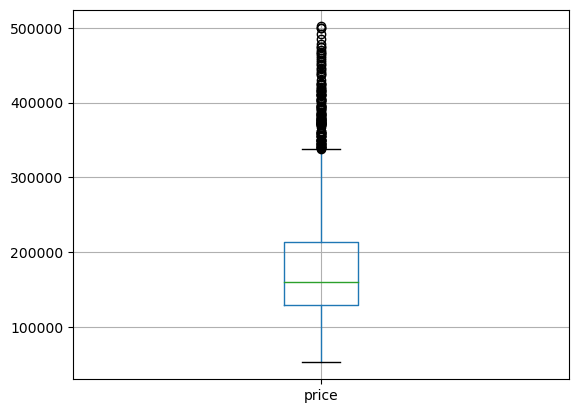

In [83]:
housing_outliers.boxplot('price')

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

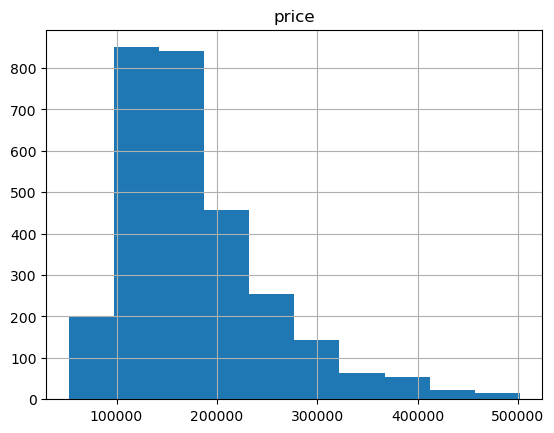

In [84]:
housing_outliers.hist('price')

# Visualizations & Correlations

In [63]:
# look at correlations compared to sale price
# housing.corr()['price']
# this gave us an error because not all attributes were numeric

# only look at numeric attriutes
numeric = housing._get_numeric_data()

# look at correlations (of numeric attributes) compared to sale price
numeric.corr()['price']

area              0.706872
price             1.000000
Lot.Area          0.266479
Overall.Qual      0.799221
Overall.Cond     -0.101846
Year.Built        0.558556
Year.Remod.Add    0.532967
Full.Bath         0.545925
Half.Bath         0.284913
Bedroom.AbvGr     0.144342
TotRms.AbvGrd     0.495870
Mo.Sold           0.035241
Yr.Sold          -0.030333
Name: price, dtype: float64

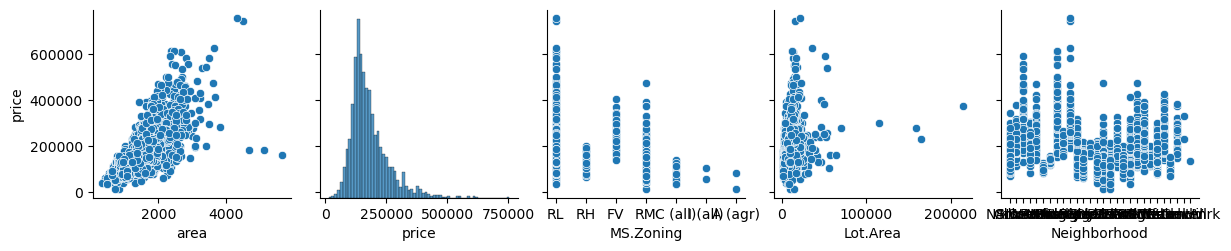

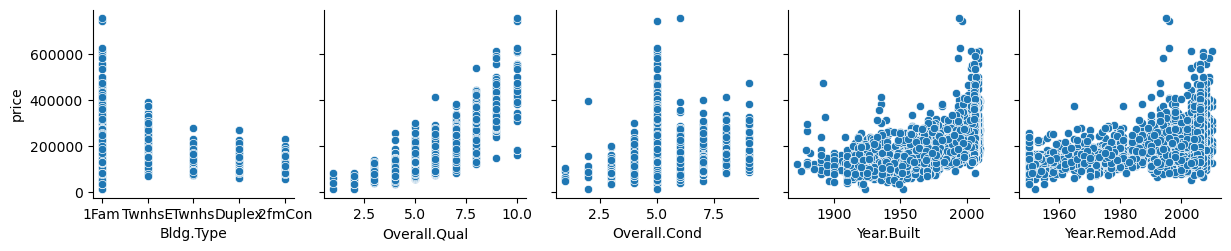

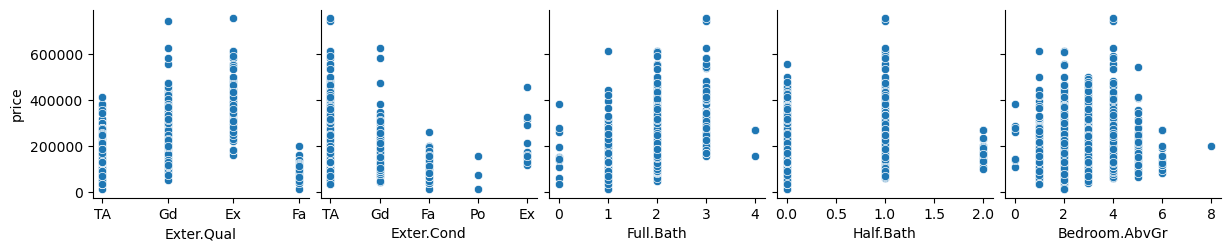

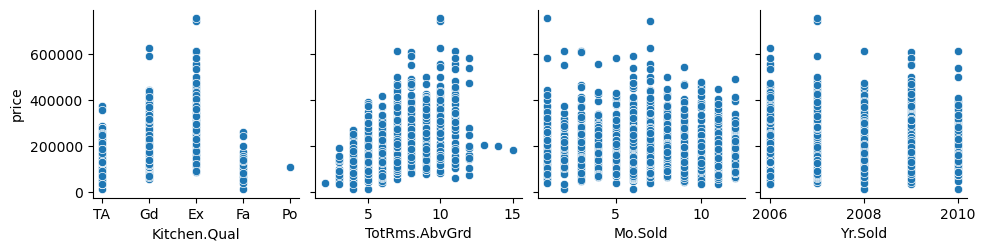

In [26]:
for i in range(0, len(housing.columns), 5):
    sns.pairplot(data=housing,
                x_vars=housing.columns[i:i+5],
                y_vars=['price'])

array([[<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'Lot.Area'}>,
        <AxesSubplot:title={'center':'Overall.Qual'}>],
       [<AxesSubplot:title={'center':'Overall.Cond'}>,
        <AxesSubplot:title={'center':'Year.Built'}>,
        <AxesSubplot:title={'center':'Year.Remod.Add'}>,
        <AxesSubplot:title={'center':'Full.Bath'}>],
       [<AxesSubplot:title={'center':'Half.Bath'}>,
        <AxesSubplot:title={'center':'Bedroom.AbvGr'}>,
        <AxesSubplot:title={'center':'TotRms.AbvGrd'}>,
        <AxesSubplot:title={'center':'Mo.Sold'}>],
       [<AxesSubplot:title={'center':'Yr.Sold'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

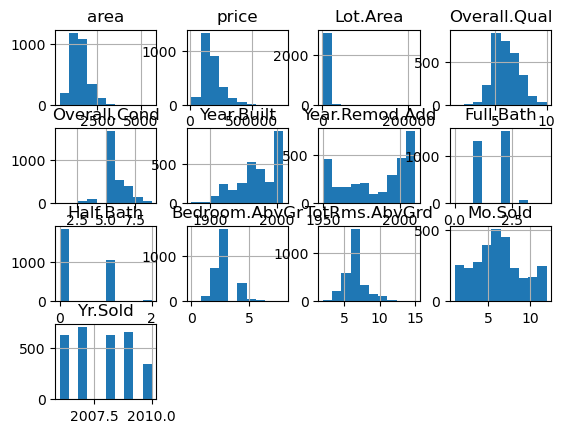

In [71]:
housing.hist(bins=10)

array([[<AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='price', ylabel='area'>,
        <AxesSubplot:xlabel='Lot.Area', ylabel='area'>,
        <AxesSubplot:xlabel='Overall.Qual', ylabel='area'>,
        <AxesSubplot:xlabel='Overall.Cond', ylabel='area'>,
        <AxesSubplot:xlabel='Year.Built', ylabel='area'>,
        <AxesSubplot:xlabel='Year.Remod.Add', ylabel='area'>],
       [<AxesSubplot:xlabel='area', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='Lot.Area', ylabel='price'>,
        <AxesSubplot:xlabel='Overall.Qual', ylabel='price'>,
        <AxesSubplot:xlabel='Overall.Cond', ylabel='price'>,
        <AxesSubplot:xlabel='Year.Built', ylabel='price'>,
        <AxesSubplot:xlabel='Year.Remod.Add', ylabel='price'>],
       [<AxesSubplot:xlabel='area', ylabel='Lot.Area'>,
        <AxesSubplot:xlabel='price', ylabel='Lot.Area'>,
        <AxesSubplot:xlabel='Lot.Area', ylabel='Lot.Area'>,
        <AxesSub

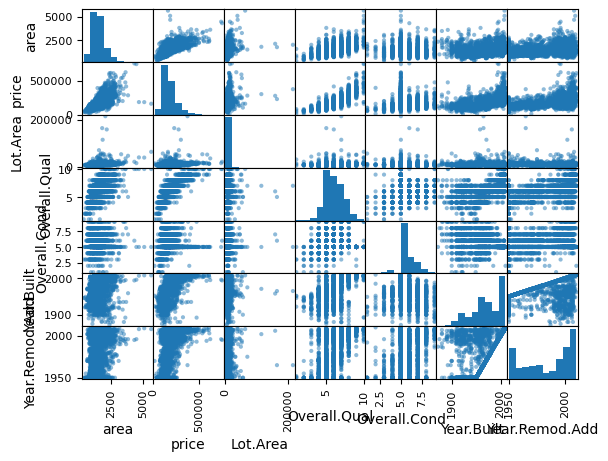

In [18]:
# quick visualization - comparing attributes to one another
from pandas.plotting import  scatter_matrix
attributes = ['area', 'price', 'Lot.Area', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add']
scatter_matrix(housing_full[attributes])

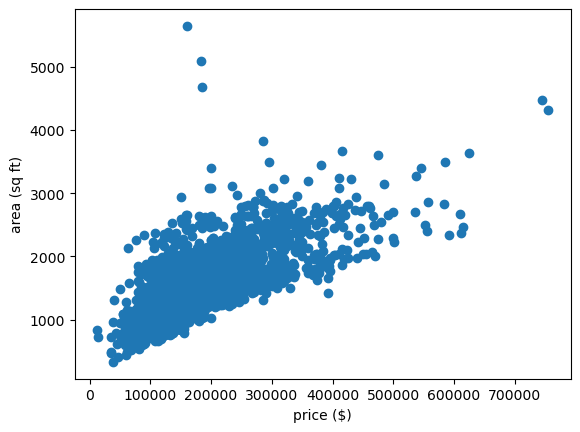

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2925    RL
2926    RL
2927    RL
2928    RL
2929    RL
Name: MS.Zoning, Length: 2930, dtype: object

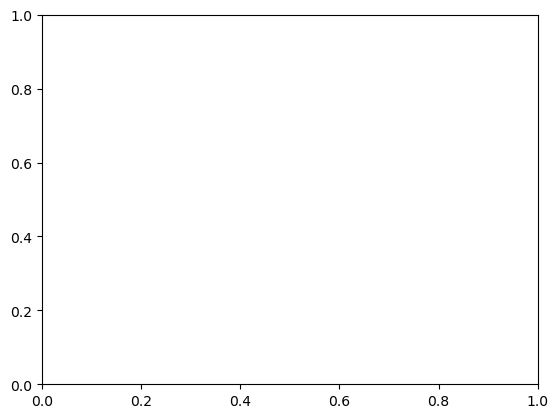

In [6]:
import matplotlib.pyplot as plt
price = housing_full['price']
area = housing_full['area']
plt.scatter(price, area)
plt.xlabel('price ($)')
plt.ylabel('area (sq ft)')
plt.show()

kitchen = housing_full['MS.Zoning']
plt.scatter(price, area, c=kitchen)
plt.xlabel('price ($)')
plt.ylabel('area (sq ft)')
plt.show()